In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
df = pd.read_csv('aggregate_results.csv')
del df['Unnamed: 0']
del df['Study Area']
del df['Zone']

In [55]:
df.head()

nrmse      ssim  cwssim    gms       Winters
0  0.691  0.818322  0.8015  0.842  2015 v. 2018
1  0.716  0.893100  0.7695  0.867  2013 v. 2018
2  0.706  0.893446  0.8040  0.869  2012 v. 2018
3  0.760  0.880182  0.8340  0.865  2017 v. 2018
4  0.709  0.859140  0.7910  0.863  2016 v. 2018

/home/cparr/miniconda3/envs/masters/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


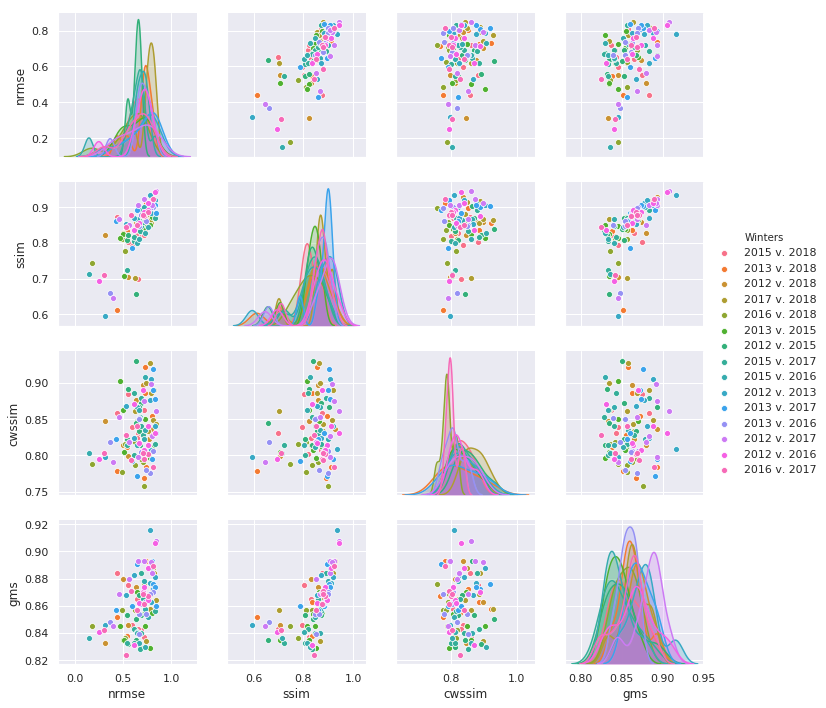

In [56]:
sns.pairplot(df, hue="Winters")

In [58]:
df = pd.read_csv('aggregate_results.csv')
del df['Unnamed: 0']
del df['Study Area']
del df['Winters']
df.head()

nrmse      ssim  cwssim    gms        Zone
0  0.691  0.818322  0.8015  0.842  clpx_swale
1  0.716  0.893100  0.7695  0.867  clpx_swale
2  0.706  0.893446  0.8040  0.869  clpx_swale
3  0.760  0.880182  0.8340  0.865  clpx_swale
4  0.709  0.859140  0.7910  0.863  clpx_swale

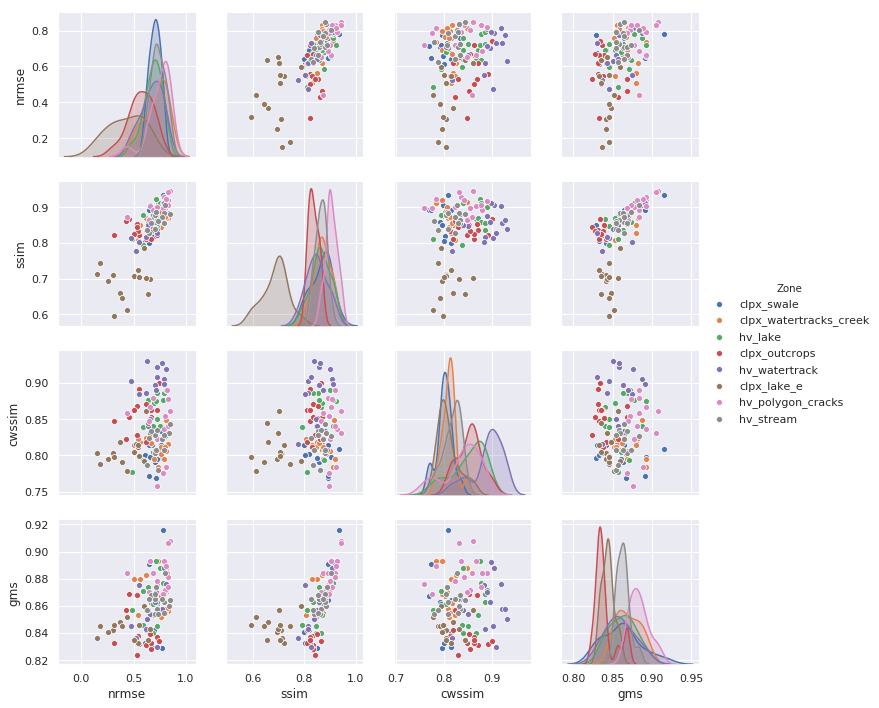

In [59]:
sns.pairplot(df, hue="Zone")

In [60]:
df = pd.read_csv('aggregate_results.csv')
del df['Unnamed: 0']
del df['Zone']
del df['Winters']
df.head()

nrmse      ssim  cwssim    gms Study Area
0  0.691  0.818322  0.8015  0.842       CLPX
1  0.716  0.893100  0.7695  0.867       CLPX
2  0.706  0.893446  0.8040  0.869       CLPX
3  0.760  0.880182  0.8340  0.865       CLPX
4  0.709  0.859140  0.7910  0.863       CLPX

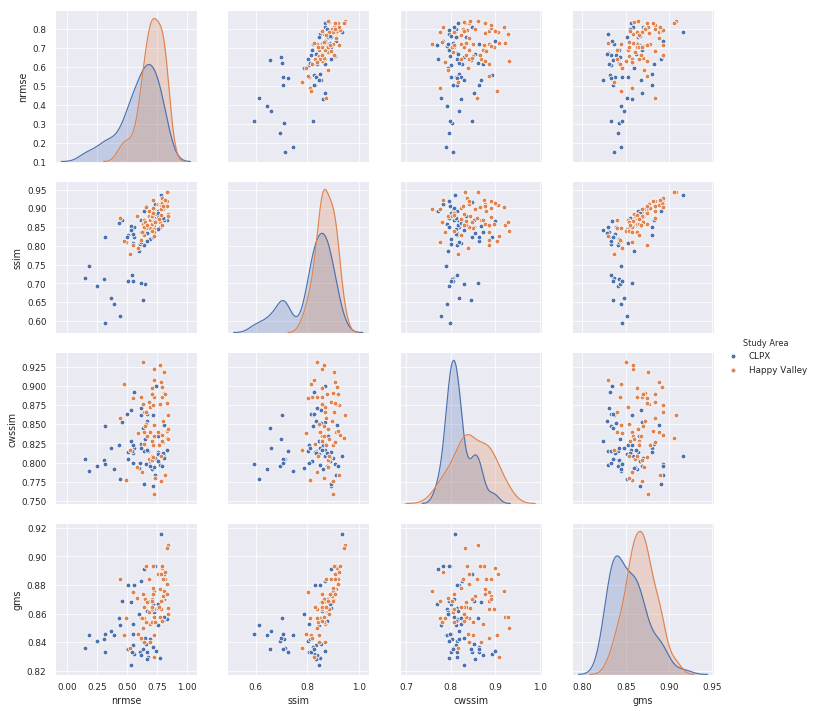

In [64]:
sns.set_context('paper')
sns.pairplot(df, hue="Study Area")

In [45]:
df = df.T
df.head()

Study Area         CLPX                                                      \
Zone         clpx_swale                                                       
Winters    2015 v. 2018 2013 v. 2018 2012 v. 2018 2017 v. 2018 2016 v. 2018   
nrmse          0.691000       0.7160     0.706000     0.760000      0.70900   
ssim           0.818322       0.8931     0.893446     0.880182      0.85914   
cwssim         0.801500       0.7695     0.804000     0.834000      0.79100   
gms            0.842000       0.8670     0.869000     0.865000      0.86300   

Study Area                                                                   \
Zone                                                                          
Winters    2013 v. 2015 2012 v. 2015 2015 v. 2017 2015 v. 2016 2012 v. 2013   
nrmse          0.775000     0.672000     0.612000     0.643000     0.783000   
ssim           0.849911     0.833213     0.805705     0.801204     0.935255   
cwssim         0.796500     0.815000     0.800000     0.814500     0.809000   
gms            0.829000     0.830000     0.833000     0.841000     0.916000   

Study Area     ...      Happy Valley                                         \
Zone           ...         hv_stream                                          
Winters        ...      2012 v. 2017 2016 v. 2017 2013 v. 2017 2017 v. 2018   
nrmse          ...          0.803000     0.708000     0.839000     0.846000   
ssim           ...          0.906212     0.879664     0.884484     0.880002   
cwssim         ...          0.826500     0.803500     0.830500     0.843500   
gms            ...          0.884000     0.869000     0.860000     0.864000   

Study Area                                                                   \
Zone                                                                          
Winters    2012 v. 2016 2012 v. 2013 2012 v. 2018 2013 v. 2016 2016 v. 2018   
nrmse          0.718000     0.787000     0.769000     0.735000     0.627000   
ssim           0.887344     0.883204     0.872356     0.862948     0.836096   
cwssim         0.807000     0.808000     0.823000     0.779500     0.787000   
gms            0.874000     0.863000     0.865000     0.854000     0.857000   

Study Area               
Zone                     
Winters    2013 v. 2018  
nrmse          0.790000  
ssim           0.854888  
cwssim         0.828500  
gms            0.855000  

[4 rows x 120 columns]

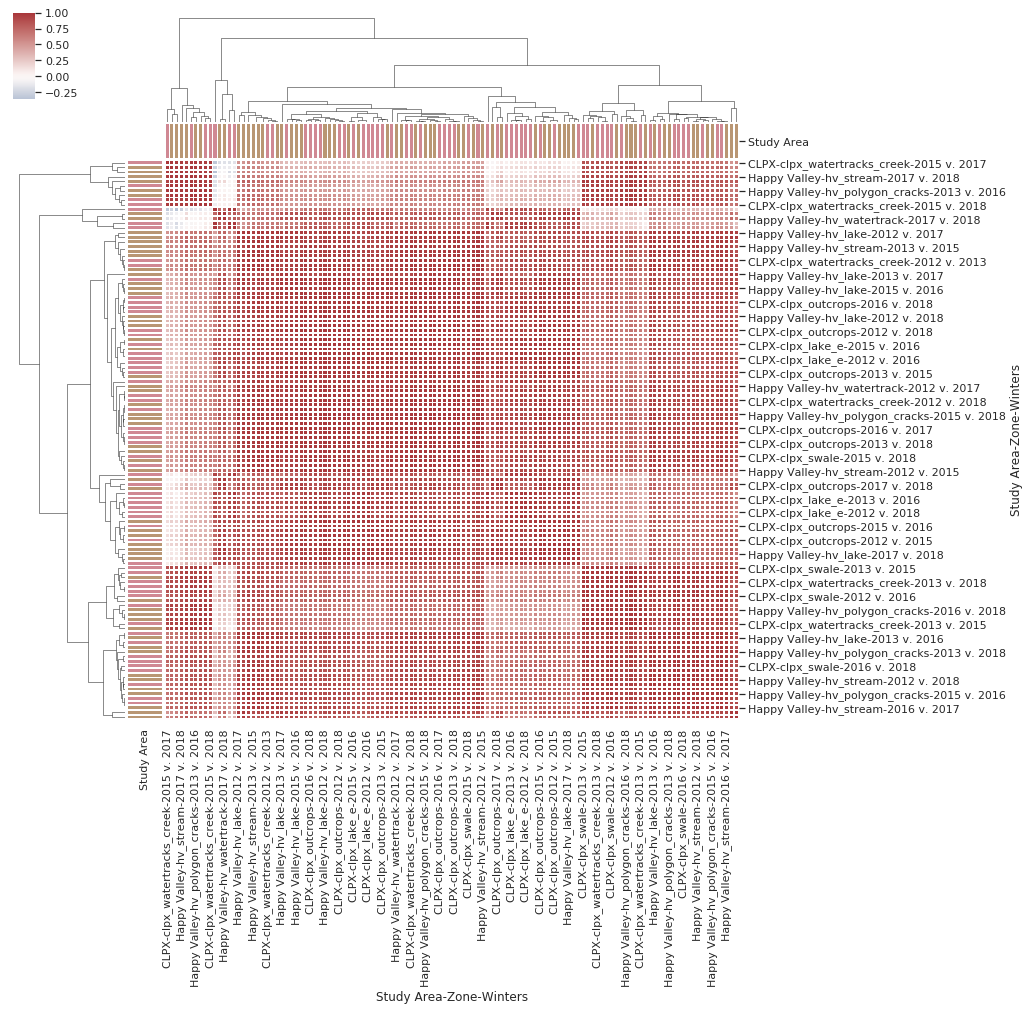

In [53]:

sns.set()

# Load the brain networks example dataset
#df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
#df.head()


#Select a subset of the networks
#used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
# used_columns = (df.columns.get_level_values("network")
#                           .astype(int)
#                           .isin(used_networks))
# df = df.loc[:, used_columns]

used_networks = ['CLPX', 'Happy Valley']
used_columns = (df.columns.get_level_values("Study Area")
                          .astype(str)
                          .isin(used_networks))

# print(used_networks)
# print(used_columns)

# Create a categorical palette to identify the networks

# network_pal = sns.husl_palette(8, s=.45)
# network_lut = dict(zip(map(str, used_networks), network_pal))


network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

#print(used_networks)
#print(network_lut)


# Convert the palette to vectors that will be drawn on the side of the matrix
# networks = df.columns.get_level_values("network")
# network_colors = pd.Series(networks, index=df.columns).map(network_lut)

networks = df.columns.get_level_values("Study Area")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)



# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))


In [27]:
lights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)


network           1                      5                     6             \
node              1                      1                     1              
hemi             lh          rh         lh         rh         lh         rh   
0         56.055744   92.031036 -35.898861  -1.889181   5.898688 -43.692322   
1         55.547253   43.690075  19.568010  15.902983 -23.231823 -10.745867   
2         60.997768   63.438793  19.247454  37.209419   2.392153  16.509109   
3         18.514868   12.657158  32.896915  11.199619 -14.665752   2.073715   
4         -2.527392  -63.104668  18.396759   3.219077 -41.856911 -24.690414   
5        -24.906792  -51.191895 -15.900566  18.471722   6.494039   4.887848   
6         17.273710    0.540083  31.080502 -23.428696  35.703693  33.255505   
7         20.712934   10.650232  46.230053   1.649448  31.022009  29.582781   
8         48.215309   46.369450  16.624685  38.645073   7.370727  16.817282   
9          2.632546   33.998898   4.341114  28.691851 -12.573429  -2.265503   
10        25.925964  -15.774749  -5.077273 -28.578943  38.747490  -2.337968   
11       -56.421814  -74.313713 -38.175583  -5.696390  25.065928  41.524002   
12       -20.486719  -18.707275 -16.169006 -16.451103  40.971012  10.036446   
13       -29.466019  -38.972973   6.017861   0.070593 -11.256913 -60.763828   
14        -4.389784  -47.513359  20.038055  -8.326096 -46.148338 -15.537797   
15       -18.445438  -13.101379  34.930843  20.495295 -17.834679 -29.141489   
16        -4.452083   17.155952 -12.001195  20.448856  32.830387  15.196656   
17       -39.546295  -18.957148 -25.074263  28.734369 -23.798439  -9.825546   
18       -46.291134   11.078963 -20.737993  39.315029  -6.919141 -27.203983   
19        -5.899357    4.405512   0.235152   3.295797  -0.354868   0.056046   
20         0.560453   35.866219  18.228313   3.514015 -18.759588   0.949558   
21       -19.945114   24.615583   6.926406  -3.371913   9.078401  -8.206392   
22       -16.305347  -15.824549 -33.360466 -35.896713  -8.892143   0.242137   
23       -18.826845  -31.083115 -51.353687 -33.099689   6.714552 -12.021935   
24       -68.351372  -47.328667 -29.358065 -38.134449 -16.120960 -16.637472   
25       -41.239174  -36.231346 -22.416826 -57.329025   2.441825   7.813742   
26       -37.635246  -32.697514  -7.219680 -32.058392 -15.066565   0.973979   
27        -7.205924  -22.471235  12.064817  -3.997512 -17.394218  17.201374   
28        20.751831   -7.137496 -13.657019 -23.823011  29.139191  11.941754   
29       -15.386735  -27.222279 -43.529598 -59.154209   8.529165 -38.190998   
..              ...         ...        ...        ...        ...        ...   
890      -21.066452   -7.763554  28.607037  24.195564 -10.290262  14.167020   
891        4.738699   -0.531491   1.737530  -2.428854 -35.048153 -16.880184   
892      -15.034314    7.501511   9.290842 -11.831652  15.704327   0.862000   
893       -2.246749    8.323643   1.434702  -2.325602 -50.698837 -34.714233   
894       30.750069   10.525861  23.736877 -14.822250 -19.978245 -44.238285   
895      163.615540  152.108368  54.720551  70.690086 -14.438983  46.750626   
896       24.541935  -29.396801   0.932005 -52.723267 -44.393478 -61.948933   
897     -109.933723 -103.237183 -22.734964 -31.652391   5.321632  -6.989466   
898     -108.607208 -104.835846   3.350493 -26.404123  37.394505  50.418118   
899     -112.576164  -98.228836 -23.472246 -16.775517  50.188492  47.385101   
900      -33.652763  -34.227898  -6.368997   2.243409  44.792831  40.987549   
901      -17.347198  -33.566647  -9.294422 -22.689241  40.023117  41.714542   
902      -13.736854  -35.782627 -48.132313 -32.988651  -1.024508  61.516056   
903      -18.138809  -26.413460 -13.857732  -0.039542  48.447552  83.359299   
904        5.245887   -1.838824  -6.428833  -9.042624  29.763212  70.764648   
905       10.630086    9.432680  30.020922  22.130157  51.125652  37.351421   
906       29.798073   22.308609   4.564800 -10.110